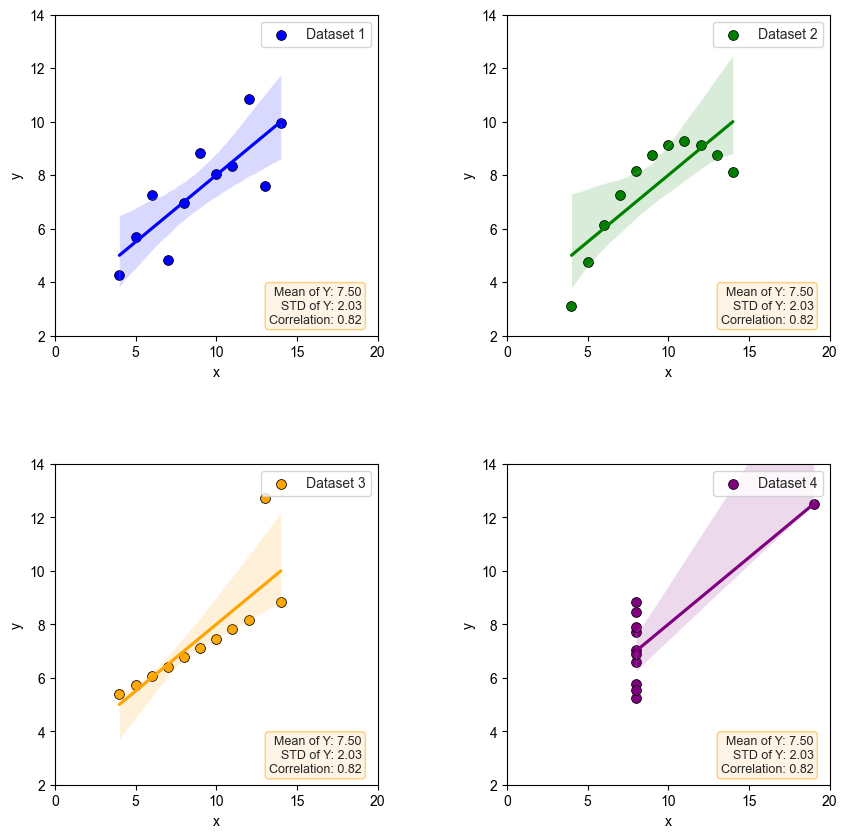

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data setup
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10),
                        gridspec_kw={'wspace': 0.4, 'hspace': 0.4})

# Styling adjustments
sns.set_style('whitegrid')
colors = ['blue', 'green', 'orange', 'purple']
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

for ax, ((label, (x, y)), color, lbl) in zip(axs.flat, zip(datasets.items(), colors, labels)):
    sns.scatterplot(x=x, y=y, ax=ax, color=color, s=50, edgecolor='black', label=lbl)
    sns.regplot(x=x, y=y, ax=ax, scatter=False, color=color, line_kws={'label':f'Linear Reg {label}'})
    ax.legend()
    ax.set(xlim=(0, 20), ylim=(2, 14))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Summary statistics for each dataset
    mean_y = np.mean(y)
    std_y = np.std(y, ddof=1)  # Sample standard deviation
    correlation = np.corrcoef(x, y)[0][1]
    
    stats_text = (f'Mean of Y: {mean_y:.2f}\n'
                  f'STD of Y: {std_y:.2f}\n'
                  f'Correlation: {correlation:.2f}')
    
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.03, stats_text, fontsize=9, bbox=bbox, transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right')

plt.show()


In [2]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt

pitstops = pd.read_csv('../data/pit_stops.csv', encoding="utf-8")

pitstops.head(200)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
195,844,67,2,23,15:40:07,22.128,22128
196,844,155,2,23,15:40:15,23.455,23455
197,844,22,2,24,15:41:43,22.868,22868
198,844,814,2,24,15:41:50,20.930,20930


In [3]:
pitstops.describe()

,raceId,driverId,stop,lap,milliseconds
count,10337.000000,10337.000000,10337.000000,10337.000000,1.033700e+04
mean,966.370804,529.700590,1.773242,25.426623,7.838557e+04
std,83.383646,388.537823,0.937299,14.911499,2.926438e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,890.000000,18.000000,1.000000,13.000000,2.191900e+04
50%,960.000000,816.000000,2.000000,25.000000,2.360800e+04
75%,1039.000000,832.000000,2.000000,36.000000,2.642700e+04
max,1115.000000,859.000000,7.000000,78.000000,3.069017e+06


In [48]:
random_race = pitstops[pitstops['raceId'] == 1073]
drivers = pd.read_csv('../data/drivers.csv', encoding="utf-8")
my_race = pd.merge(random_race, drivers, on='driverId', how='left')

my_race.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url
0,1073,854,1,10,17:18:55,22.124,22124,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
1,1073,830,1,13,17:22:42,21.152,21152,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
2,1073,1,1,14,17:24:04,21.595,21595,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,1073,844,1,15,17:26:08,22.461,22461,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc
4,1073,839,1,15,17:26:13,21.677,21677,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon


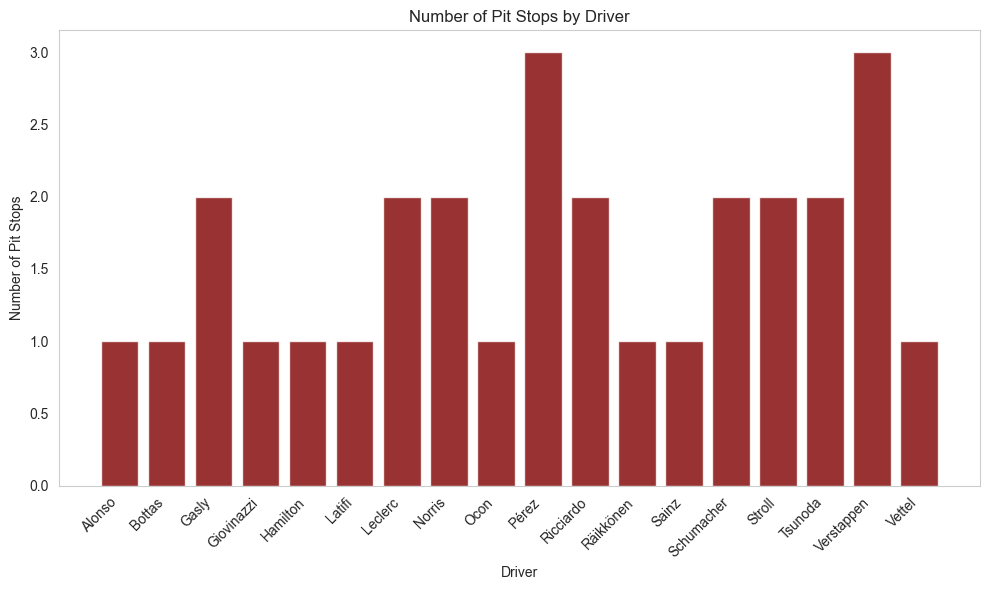

In [61]:
# Group the data by 'Driver' and sum the 'PitStops' in case of multiple entries for a driver
pitstop_counts = my_race.groupby('surname')['stop'].count().reset_index()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(pitstop_counts['surname'], pitstop_counts['stop'], color = 'maroon', alpha = 0.8)

# Adding chart title and axis labels
plt.title('Number of Pit Stops by Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Pit Stops')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(False)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [6]:
lap_times = pd.read_csv('../data/lap_times.csv',encoding = "utf-8")
races = pd.read_csv('../data/races.csv',encoding = "utf-8")
drivers = pd.read_csv('../data/drivers.csv',encoding = "utf-8")

print('This is the Lap Times data')
lap_times.head()

This is the Lap Times data


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [13]:
random_driver = lap_times[(lap_times['raceId'] == 1073) & (lap_times['driverId'] == 1)] 
# Abu Dhabi Grand Prix 2021 for 

random_driver.describe()

,raceId,driverId,lap,position,milliseconds
count,58.0,58.0,58.000000,58.000000,58.000000
mean,1073.0,1.0,29.500000,1.120690,93441.396552
std,0.0,0.0,16.886879,0.328611,15662.301125
min,1073.0,1.0,1.000000,1.000000,86615.000000
25%,1073.0,1.0,15.250000,1.000000,87486.750000
50%,1073.0,1.0,29.500000,1.000000,88041.500000
75%,1073.0,1.0,43.750000,1.000000,88790.500000
max,1073.0,1.0,58.000000,2.000000,152083.000000


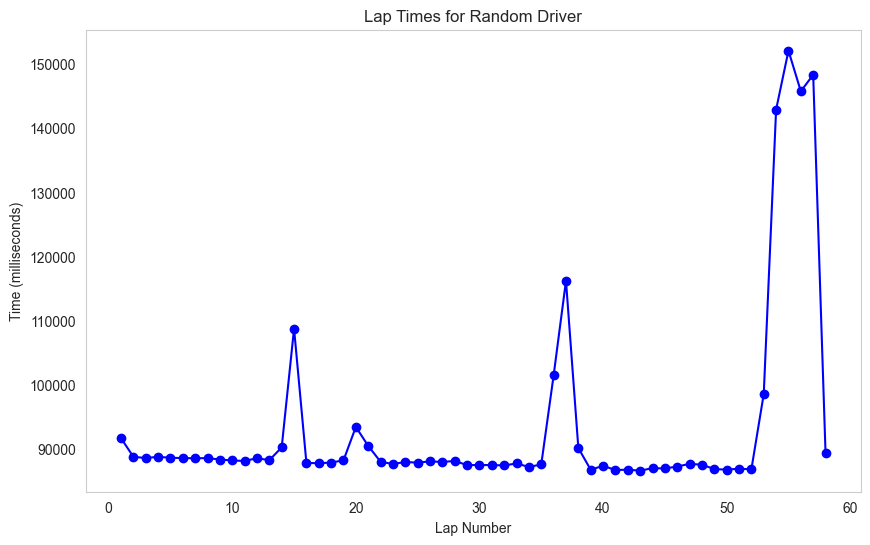

In [14]:
# Plotting
plt.figure(figsize=(10, 6))  #Adjusts the figure size
plt.plot(random_driver['lap'], random_driver['milliseconds'], linestyle='-', color='blue')

# Adding title and labels
plt.title('Lap Times for Random Driver')
plt.xlabel('Lap Number')
plt.ylabel('Time (milliseconds)')

plt.grid(False)  
plt.show()


In [17]:
random_race = lap_times[lap_times['raceId'] == 1073]
random_race.head()

,raceId,driverId,lap,position,time,milliseconds
513594,1073,1,1,1,1:31.686,91686
513595,1073,1,2,1,1:28.791,88791
513596,1073,1,3,1,1:28.587,88587
513597,1073,1,4,1,1:28.789,88789
513598,1073,1,5,1,1:28.630,88630


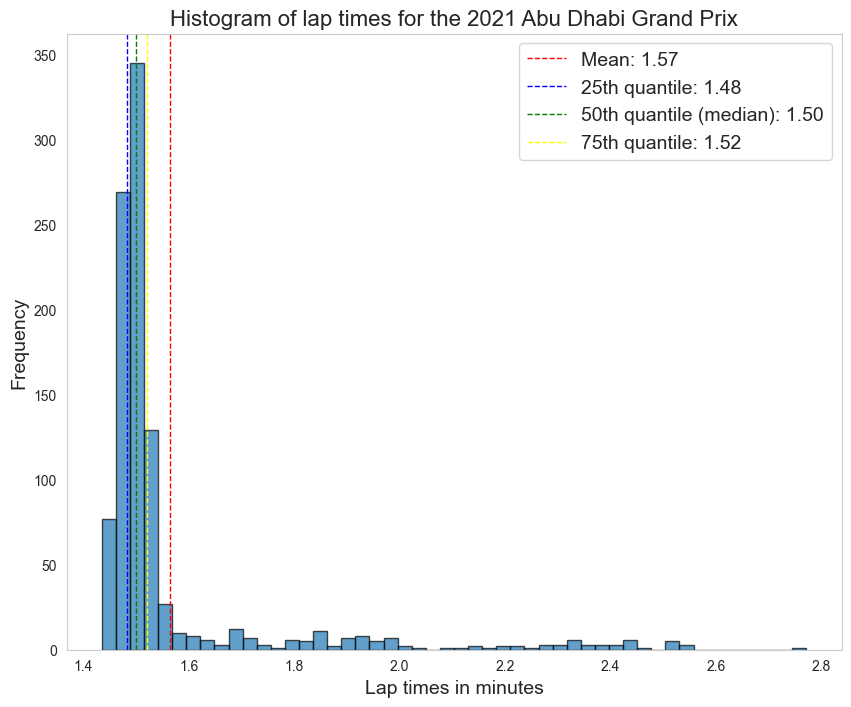

In [42]:
random_race = random_race.copy() # make copy to modify without changing original dataset
random_race['minutes'] = random_race['milliseconds']/60000
plt.figure(figsize = (10, 8))
plt.hist(random_race['minutes'], bins = 50, edgecolor = 'black', alpha = 0.7)

# Adding mean and quantiles
mean_val = random_race['minutes'].mean()
quantile_25 = random_race['minutes'].quantile(0.25)
quantile_50 = random_race['minutes'].quantile(0.50)
quantile_75 = random_race['minutes'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")


plt.title(f'Histogram of lap times for the 2021 Abu Dhabi Grand Prix', fontsize = 16)
plt.xlabel('Lap times in minutes', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.grid(False)
plt.legend(fontsize = 14)
plt.show()

In [64]:
constructors = pd.read_csv('../data/constructors.csv',encoding = "utf-8")
print('This is the Constructors data')
constructors.head()

This is the Constructors data


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


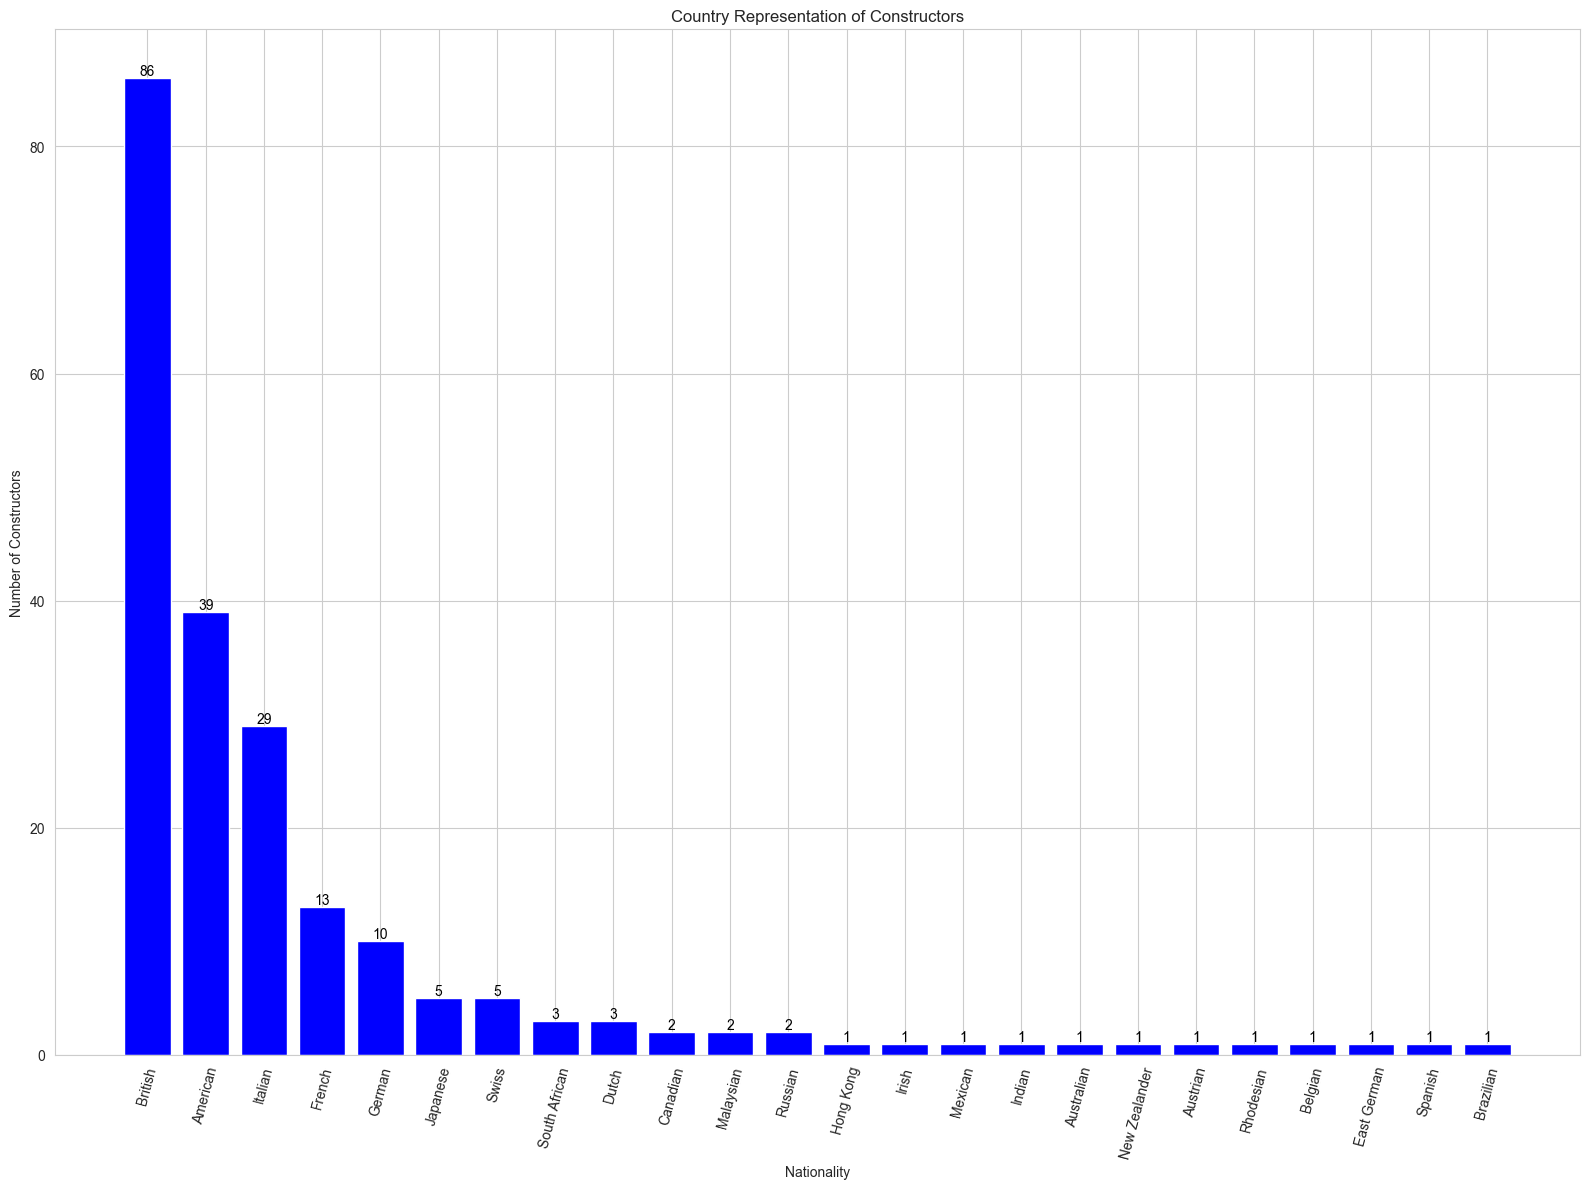

In [68]:
# visualize the nationality distribution
nationality_counts = constructors['nationality'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 12))  # adjust the size of the bar chart

ax = plt.bar(nationality_counts.index, nationality_counts.values, color = 'blue')

# Add annotation to bars
for barz in ax:
    height = barz.get_height()
    plt.text(barz.get_x() + barz.get_width() / 2., height,
             '%d' % int(height), ha='center', va='bottom', color='black')

plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.title('Country Representation of Constructors')
plt.xticks(rotation=75)  # rotate x labels for better readability

plt.tight_layout()  # fit labels within the figure boundaries
plt.show()

In [92]:
sprint = pd.read_csv('../data/sprint_results.csv', encoding="utf-8")
results = pd.read_csv('../data/results.csv', encoding="utf-8")
races = pd.read_csv('../data/races.csv', encoding="utf-8")

sprint = sprint[['raceId', 'driverId', 'constructorId', 'points', 'laps', 'milliseconds']]
sprint.rename(columns = {'milliseconds': 'sprint_time'}, inplace = True)
sprint.rename(columns = {'points': 'sprint_points'}, inplace = True)
sprint.rename(columns = {'laps': 'sprint_laps'}, inplace = True)

# remove missing values
sprint.replace('\\N', np.nan, inplace=True)
sprint.dropna(inplace=True)
sprint.head()

results = results[['raceId', 'driverId', 'points', 'laps', 'milliseconds']]
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
results.rename(columns = {'points': 'race_points'}, inplace = True)
results.rename(columns = {'laps': 'race_laps'}, inplace = True)

# remove missing values
results.replace('\\N', np.nan, inplace=True)
results.dropna(inplace=True)
results.head()

print(results['race_time'].dtype)
results['race_time'] = results['race_time'].astype(int)
print(results['race_time'].dtype)

my_races = races[['raceId', 'year', 'name']]

print(sprint['sprint_time'].dtype)
sprint['sprint_time'] = sprint['sprint_time'].astype(int)
print(sprint['sprint_time'].dtype)

object
int64
object
int64


In [108]:
sprint_race = pd.merge(sprint, results, on = ['raceId', 'driverId'], how = 'left')
sprint_race = pd.merge(sprint_race, my_races, on = ['raceId'], how = 'left')

sprint_race = sprint_race.copy()
azerbaijan = sprint_race[sprint_race['name'] == 'Azerbaijan Grand Prix']

azerbaijan = azerbaijan.copy()
# remove missing values
azerbaijan.replace('\\N', np.nan, inplace=True)
azerbaijan.dropna(inplace=True)

azerbaijan.head()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time,race_points,race_laps,race_time,year,name
114,1101,815,9,8,17,1997667,25.0,51.0,5562436.0,2023,Azerbaijan Grand Prix
115,1101,844,6,7,17,2002130,15.0,51.0,5583653.0,2023,Azerbaijan Grand Prix
116,1101,830,9,6,17,2002732,18.0,51.0,5564573.0,2023,Azerbaijan Grand Prix
117,1101,847,131,5,17,2001134,5.0,51.0,5636676.0,2023,Azerbaijan Grand Prix
118,1101,832,6,4,17,2008055,10.0,51.0,5607927.0,2023,Azerbaijan Grand Prix


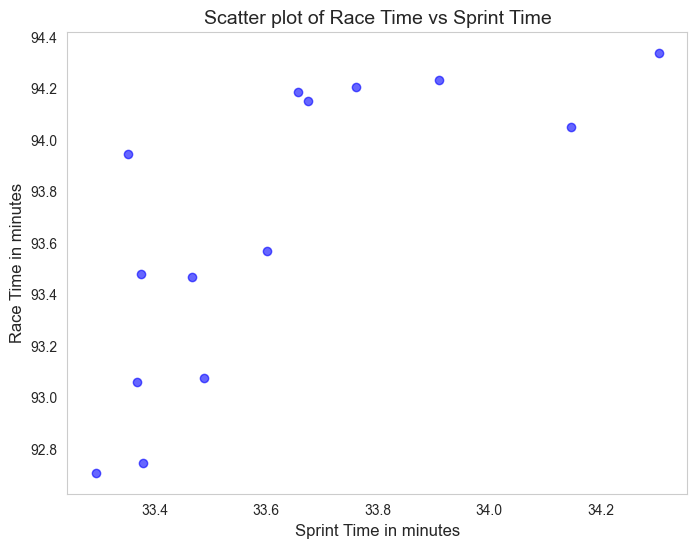

In [111]:
plt.figure(figsize = (8,6))
plt.scatter(azerbaijan['sprint_time']/60000, # divide by 60000 to get time in minutes
            azerbaijan['race_time']/60000, # divide by 60000 to get time in minutes
            color = 'blue', alpha = 0.6)
plt.title('Scatter plot of Race Time vs Sprint Time', fontsize = 14)
plt.xlabel('Sprint Time in minutes', fontsize = 12)
plt.ylabel('Race Time in minutes', fontsize = 12)
plt.grid(False)
plt.show()

In [113]:
results = pd.read_csv('../data/results.csv', encoding="utf-8")
grid_cols = ['raceId', 'driverId', 'constructorId', 'grid', 'position']

grid_final = results[grid_cols]
grid_final = grid_final.copy() # create a copy to avoid changing the original

# Filter out rows where 'grid' or 'position' is zero
# Either cause driver didn't participate or finish the race
grid = grid_final[(grid_final['grid'] != 0) & (grid_final['position'] != 0)]


# remove null values
grid_final.replace('\\N', np.nan, inplace=True)
grid_final.dropna(inplace=True)
grid_final.head()

# change any float objects to integer
print(grid_final['grid'].dtype)
grid_final['grid'] = grid_final['grid'].astype(int)
print(grid_final['grid'].dtype)

print(grid_final['position'].dtype)
grid_final['position'] = grid_final['position'].astype(int)
print(grid_final['position'].dtype)

int64
int64
object
int64


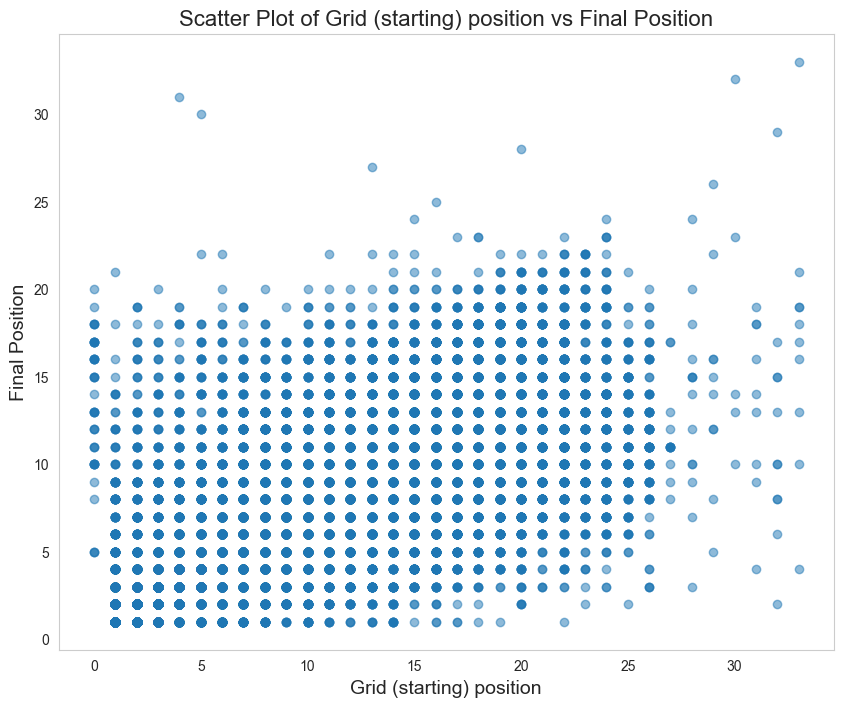

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(grid_final['grid'], 
            grid_final['position'], 
            label = 'Data', alpha = 0.5)
plt.xlabel('Grid (starting) position', fontsize = 14)
plt.ylabel('Final Position', fontsize = 14)
plt.title('Scatter Plot of Grid (starting) position vs Final Position', fontsize = 16)
plt.grid(False)
plt.show()

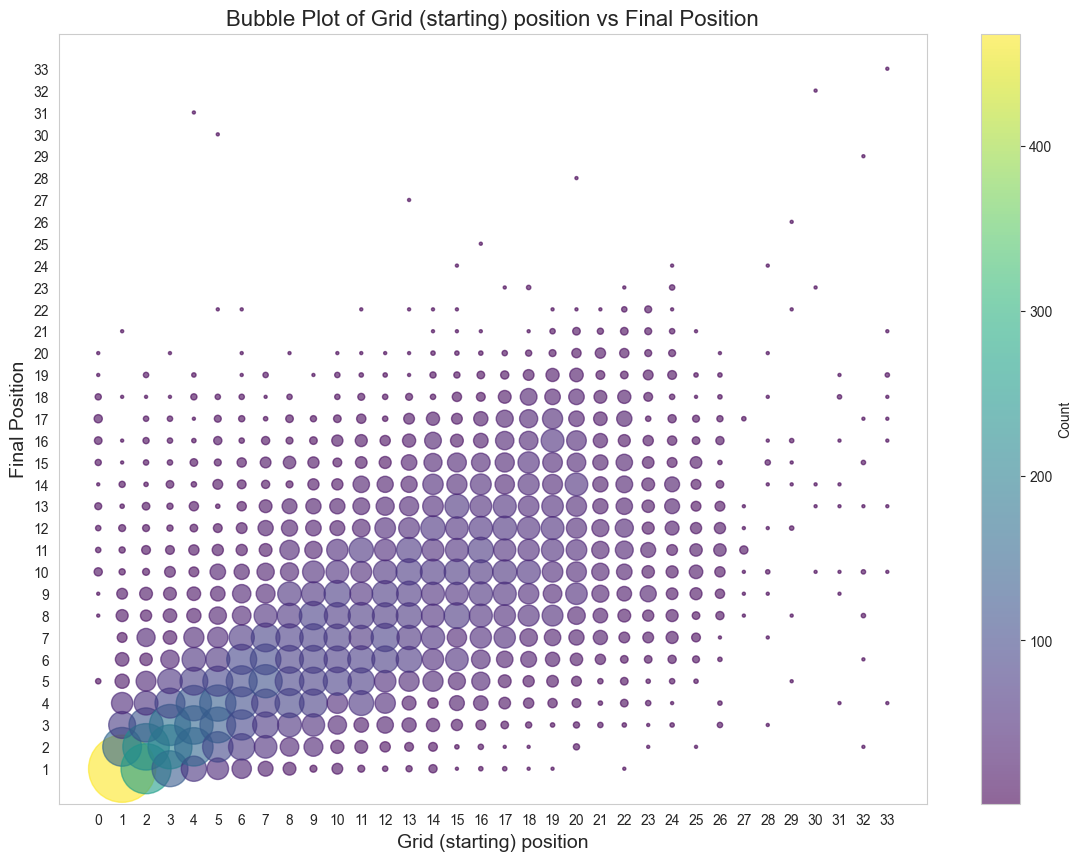

In [127]:
# Visualize
from matplotlib.colors import Normalize

# Counting occurrences of each pair
df = pd.DataFrame({'X': grid_final['grid'], 'y': grid_final['position']})
counts = df.groupby(['X', 'y']).size().reset_index(name = 'counts')

# Plotting
size_scale = 5  # Adjust the size scale for visibility
norm = Normalize(vmin = counts['counts'].min(), vmax = counts['counts'].max())

plt.figure(figsize=(14, 10))
scatter = plt.scatter(counts['X'], counts['y'], s = counts['counts'] * size_scale, 
                    c = counts['counts'], cmap = 'viridis', norm = norm, alpha = 0.6)

# Create colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Discrete axis with integers
plt.xticks(np.arange(min(counts['X']), max(counts['X'])+1, 1))
plt.yticks(np.arange(min(counts['y']), max(counts['y'])+1, 1))
plt.xlabel('Grid (starting) position', fontsize = 14)
plt.ylabel('Final Position', fontsize = 14)
plt.title('Bubble Plot of Grid (starting) position vs Final Position', fontsize = 16)
plt.grid(False)
plt.show()
